## Exploring the Filipino Family Income and Expenditure Dataset [WIP]
- Kaggle Competition and dataset details: https://www.kaggle.com/grosvenpaul/family-income-and-expenditure
- Resources used: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

<i>Please let me know if there are any errors or if anything can be further improved upon. </i>

The outline for this kernel is as follows:
1. <b>Exploratory Data Analysis and Data Visualization</b> - I start by plotting different variables against each other and digging into some interesting correlations. 
2. <b>Data Pre-processing</b> - Missing values are handled; data is standardized/ normalized (mean is zero standard deviation is 1)
3. <b>Prediction of Household Income</b> - machine learning techniques are applied to the dataset to achieve the following:
    - classify new instances (classification) as either low, middle, or high income
    - predict the household income (regression)

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [206]:
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [125]:

df = pd.read_csv("Family-Income-and-Expenditure.csv")

In [126]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
Total Household Income                           41544 non-null int64
Region                                           41544 non-null object
Total Food Expenditure                           41544 non-null int64
Main Source of Income                            41544 non-null object
Agricultural Household indicator                 41544 non-null int64
Bread and Cereals Expenditure                    41544 non-null int64
Total Rice Expenditure                           41544 non-null int64
Meat Expenditure                                 41544 non-null int64
Total Fish and  marine products Expenditure      41544 non-null int64
Fruit Expenditure                                41544 non-null int64
Vegetables Expenditure                           41544 non-null int64
Restaurant and hotels Expenditure                41544 non-null int64
Alcoholic Beverages Expenditure                  

## Inspecting the Variables
If we want to better understand our data, we first need to understand the meaning and relevance of the variables. Remember that the target variable we are trying to predict is `Total Household Income`. Thus, for each variable, we ask ourselves:
- Do we think about this variable when we're trying to predict household income? 
- If so, how important is this variable in determining our target variable?

We can roughly group the different variables based on the information they provide:
- <b>Expenditures</b> - describes the amount of spending allocated to a certain commodity (e.g. Bread and Cereals Expenditure, Total Rice Expenditure)
- <b>Household Head</b> - age, sex, marital status, education of the household breadwinner
- <b>Household Family Members</b>- type of family, number, age, and employment status of family members
- <b>Number of [Commodities] Owned</b> - e.g. fridges, washing machines, television

The task at at hand is similar to the scenario of coming to a friend's house and judging how high they earn just by looking around and observing how much they spend on certain goods. Obviously, someone with more gadgets, vehicles, and other luxuries tend to have higher income. 

### Total Household Income
Let's start by taking a closer look at our target variable.

In [128]:
target = 'Total Household Income'
df[target].describe()

count    4.154400e+04
mean     2.475556e+05
std      2.868805e+05
min      1.128500e+04
25%      1.048950e+05
50%      1.640795e+05
75%      2.911385e+05
max      1.181599e+07
Name: Total Household Income, dtype: float64

Observations:
- The average household income is P247,555.60 per year. That's an average of P20,629.63 per month. 
- The median income is at P164,079.50 per year or P13,673.29 per month.
- The highest income is P11,815,990.00 per year or P984,665.00 per month.
- The lowest being P11,285.00 per year or P940 per month.

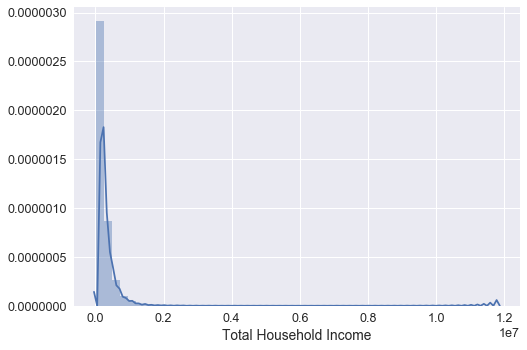

In [129]:
sns.distplot(df[target])
plt.show()

In [130]:
print("Skewness:", df[target].skew())

('Skewness:', 8.8966310471329813)


Taking a look at the distribution, we see that the total household income:
- deviates from the normal distribution
- has a positive skewness

Alright, let's see how the variable correlate with one another.

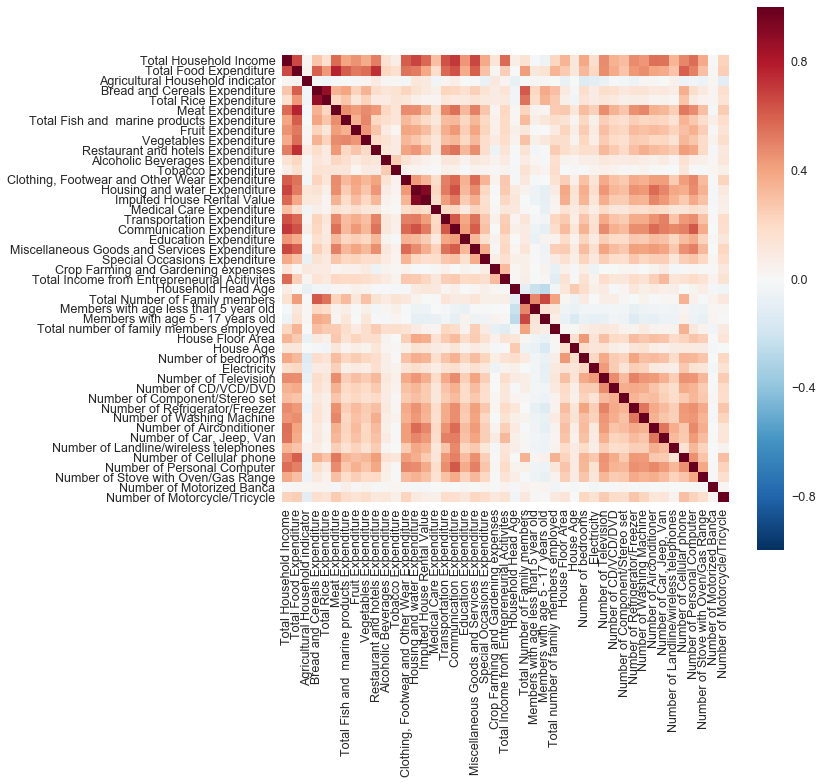

In [131]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1.0, square=True)
plt.show()

We can see some standouts; Total Food Expenditure, Communication Expenditure, and Housing and water Expenditure for example, seem highly correlated with Income. Lets zoom in.

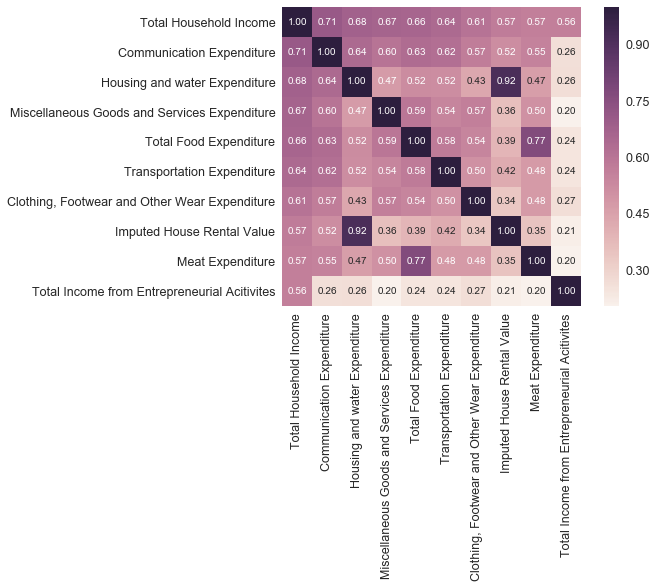

In [132]:
k = 10 
cols = corrmat.nlargest(k, target)[target].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The above heatmap shows the top ten variables most highly correlated with Total Household Income. We find that higher spendings for communication, housing and water, miscellaneous goods, food, transportation, clothing, house renal, and meat implies a higher income.

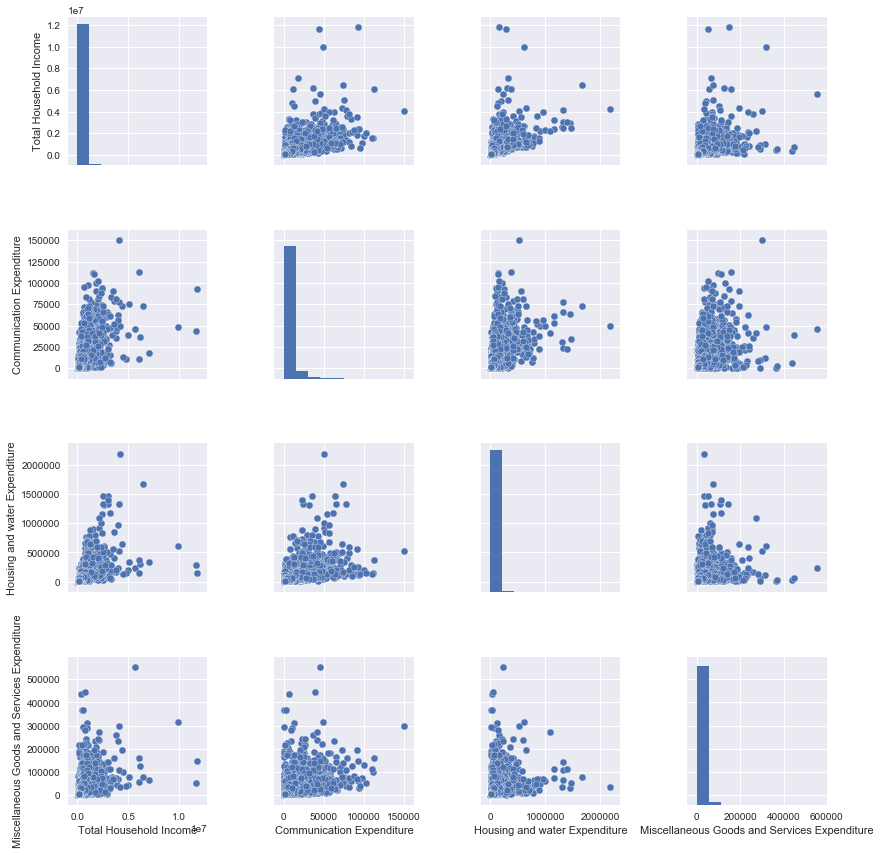

In [133]:
sns.set()
sns.pairplot(df[list(cols)[:4]], size = 3)
plt.show()

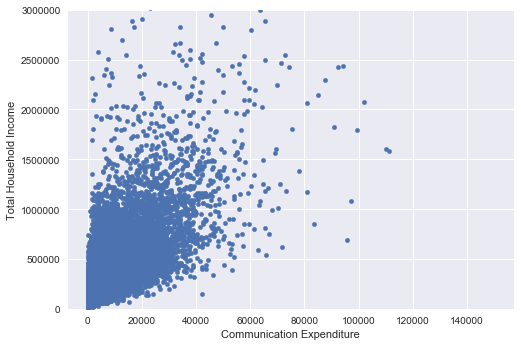

In [134]:
var = 'Communication Expenditure'
data = pd.concat([df[target], df[var]], axis=1)
data.plot.scatter(x=var, y=target, ylim=(0,3000000))
plt.show()

<i>Total Household Income and Communication Expenditure have a linear relationship. </i>

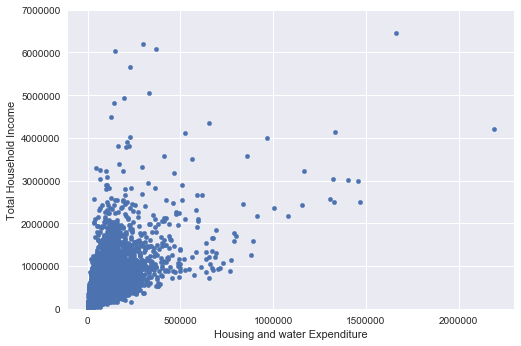

In [135]:
var = 'Housing and water Expenditure'
data = pd.concat([df[target], df[var]], axis=1)
data.plot.scatter(x=var, y=target, ylim=(0,7000000))
plt.show()

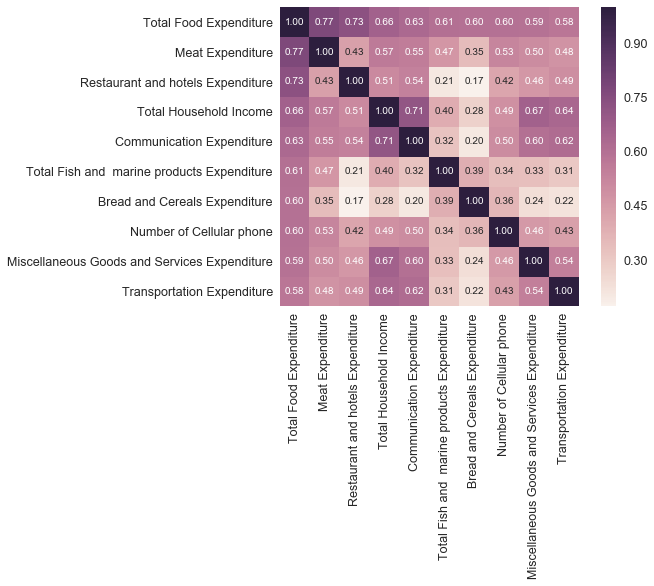

In [136]:
k = 10 
var = 'Total Food Expenditure'
cols = corrmat.nlargest(k, var)[var].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

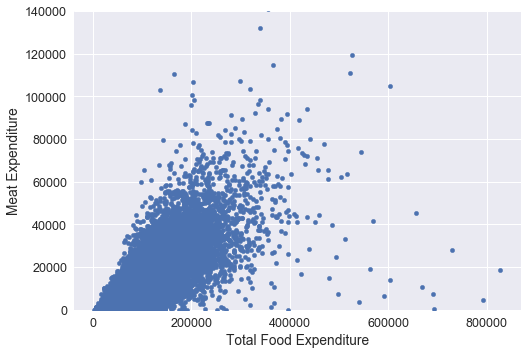

In [137]:
var_ = 'Meat Expenditure'
data = pd.concat([df[var], df[var_]], axis=1)
data.plot.scatter(x=var, y=var_, ylim=(0,140000))
plt.show()

For Filipinos, meat makes up a large portion of our meals; thus, we find a positive correlation between food and and meat expenditures.

### Numerical Variables

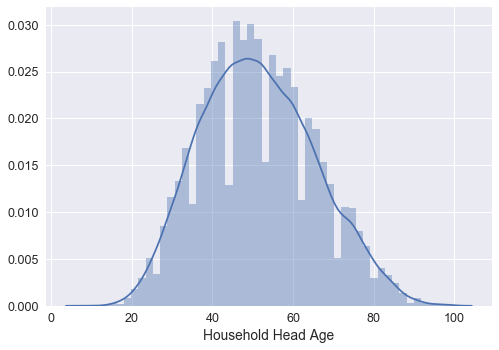

In [138]:
var = 'Household Head Age'
sns.distplot(df[var])
plt.show()

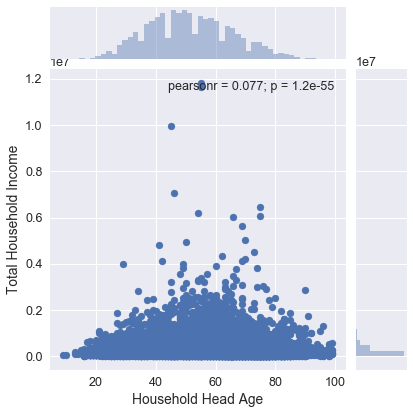

In [139]:
sns.jointplot(x=var, y=target, data=df);
plt.show()

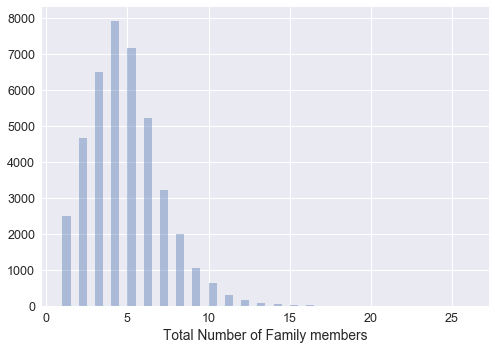

In [140]:
var = 'Total Number of Family members'
sns.distplot(df[var], kde=False)
plt.show()

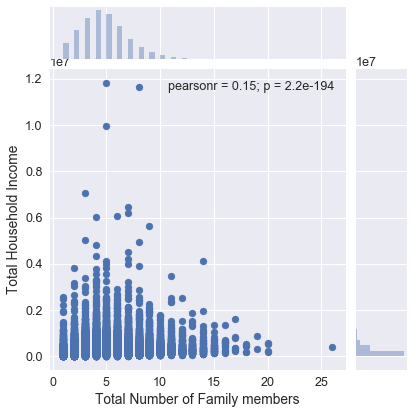

In [141]:
sns.jointplot(x=var, y=target, data=df);
plt.show()

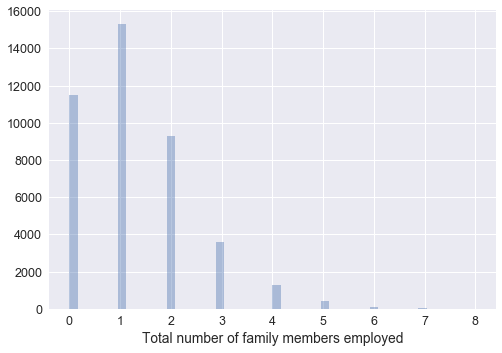

In [142]:
var = 'Total number of family members employed'
sns.distplot(df[var], kde=False)
plt.show()

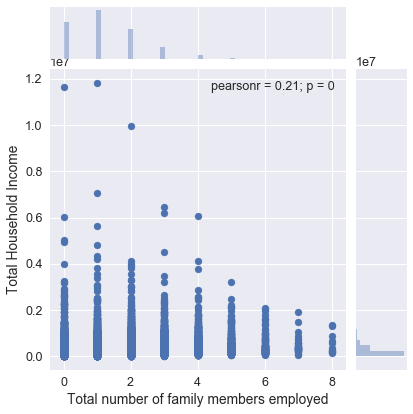

In [143]:
sns.jointplot(x=var, y=target, data=df)
plt.show()

Interesting... the more that are employed, the less the Total Household Income? Seems pretty counterintuitive.

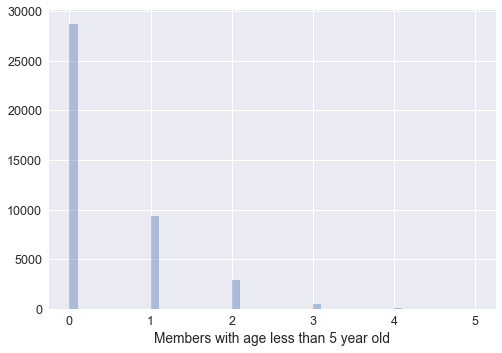

In [144]:
var = 'Members with age less than 5 year old'
sns.distplot(df[var], kde=False)
plt.show()

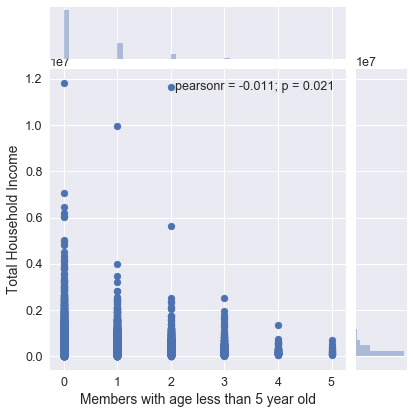

In [145]:
sns.jointplot(x=var, y=target, data=df)
plt.show()

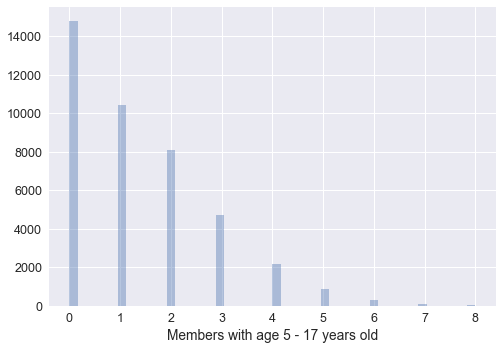

In [146]:
var = 'Members with age 5 - 17 years old'
sns.distplot(df[var], kde=False)
plt.show()

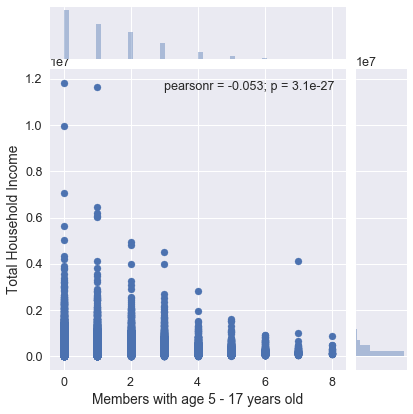

In [147]:
sns.jointplot(x=var, y=target, data=df)
plt.show()

### Categorical Variables
We now take a look at the strip plots of different variables plotted against Total Household Income. 

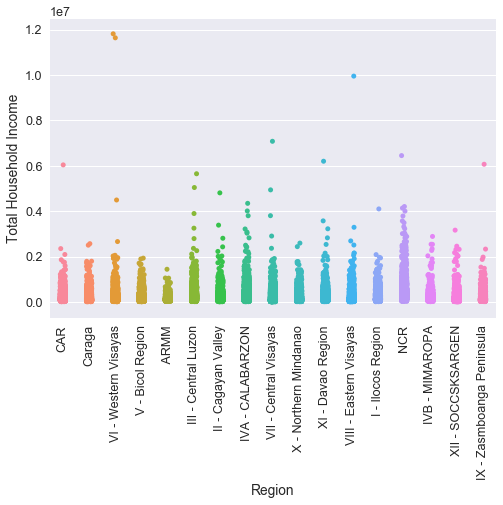

In [148]:
var = 'Region' 
s = sns.stripplot(x=var, y=target, data=df, jitter=True)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

We see that the household with the highest income resides in Region VI - Western Visayas. 

However, this seaborn strip plot doesn't give us a very good visualization of the distribution of the household income for the different regions. Let's look at the box plots. 

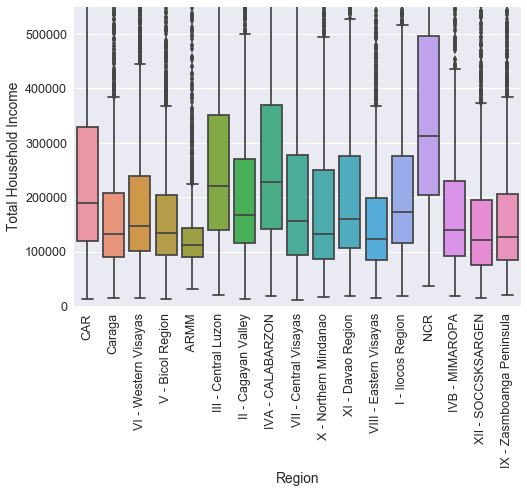

In [149]:
var = 'Region' 
s = sns.boxplot(x=var, y=target, data=df)
s.set_ylim(0,550000)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

We see here that families residing in NCR (Metro Manila) enjoy an overall greater total household income. The runner up is CALABARZON, which is about an hour or two from Metro Manila. 

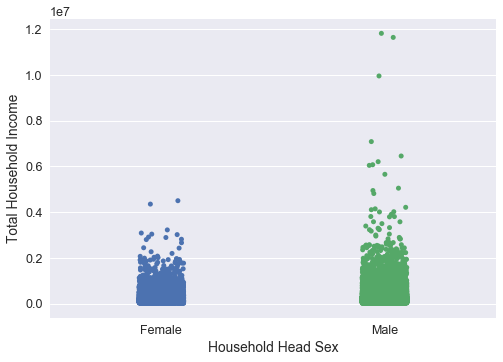

In [150]:
sex = 'Household Head Sex' 
sns.stripplot(x=sex, y=target, data=df, jitter=True)
plt.show()

In [151]:
df[sex].value_counts()

Male      32483
Female     9061
Name: Household Head Sex, dtype: int64

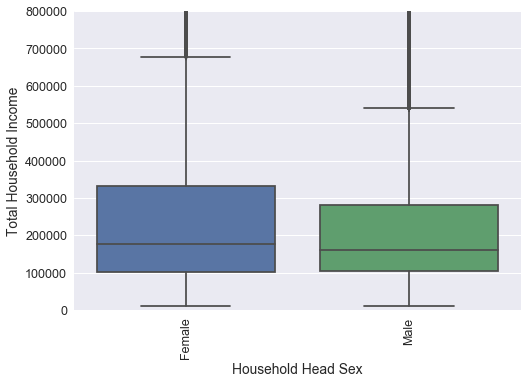

In [152]:
s = sns.boxplot(x=sex, y=target, data=df)
s.set_ylim(0,800000)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

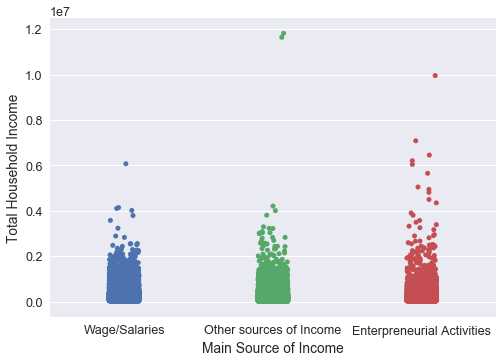

In [153]:
var = 'Main Source of Income'
sns.stripplot(x=var, y=target, data=df, jitter=True)
plt.show()

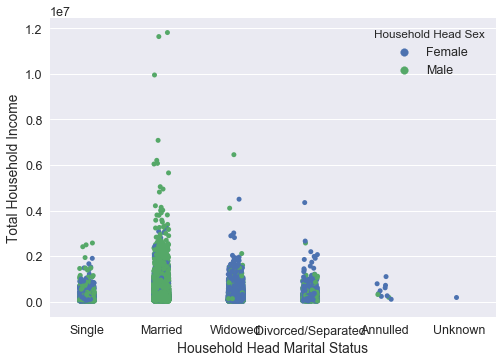

In [154]:
var = 'Household Head Marital Status'
sns.stripplot(x=var, y=target, hue=sex, data=df, jitter=True)
plt.show()

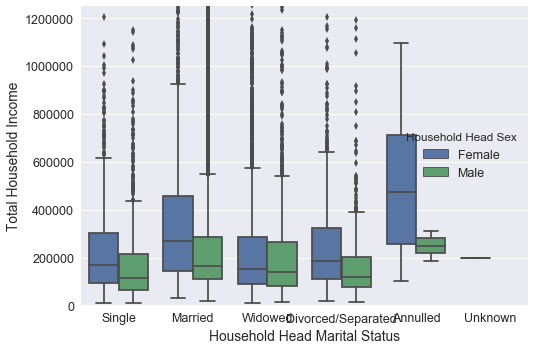

In [155]:
var = 'Household Head Marital Status'
s = sns.boxplot(x=var, y=target, hue=sex, data=df)
s.set_ylim(0,1250000)
plt.show()

In [189]:
df[var] = df[var].replace('Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)', 'Programs of Education at the Third Level');
df[var] = df[var].replace('Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree', 'Third Level that Leads to Non-Baccalureate Award')

In [190]:
var = 'Household Head Highest Grade Completed'
df[var].astype('category').cat.categories;

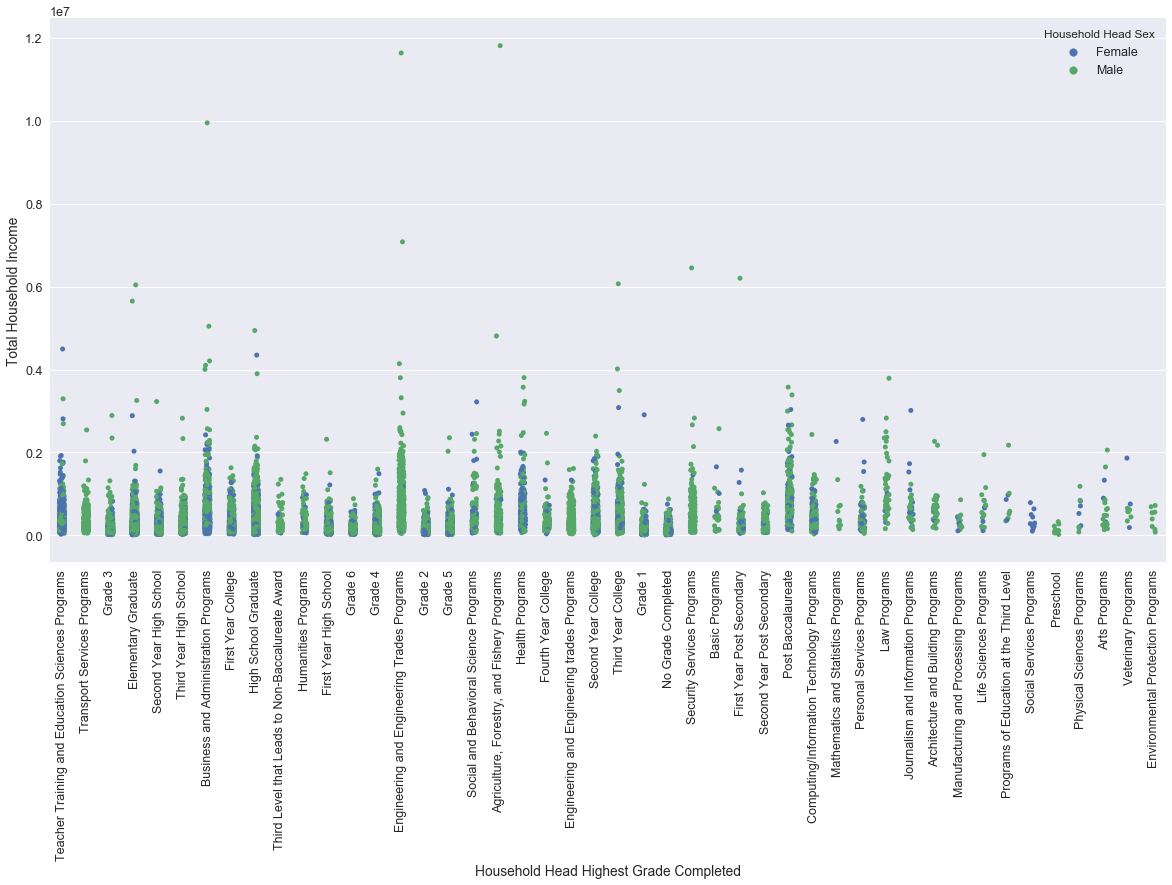

In [191]:
var = 'Household Head Highest Grade Completed' 
f, ax = plt.subplots(figsize=(20, 10))
s = sns.stripplot(x=var, y=target, hue=sex, data=df, jitter=True)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

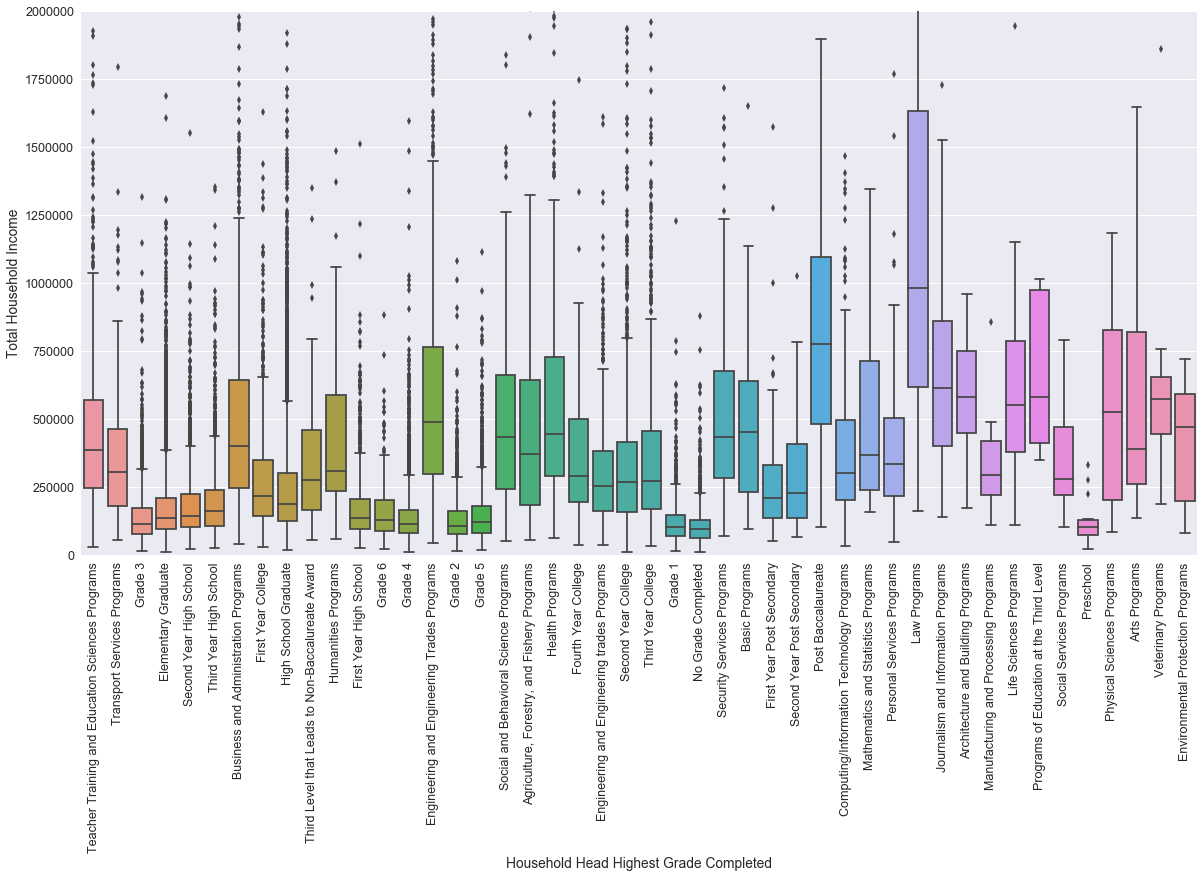

In [192]:
var = 'Household Head Highest Grade Completed' 
f, ax = plt.subplots(figsize=(20, 10))
s = sns.boxplot(x=var, y=target, data=df)
s.set_ylim(0,2000000)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

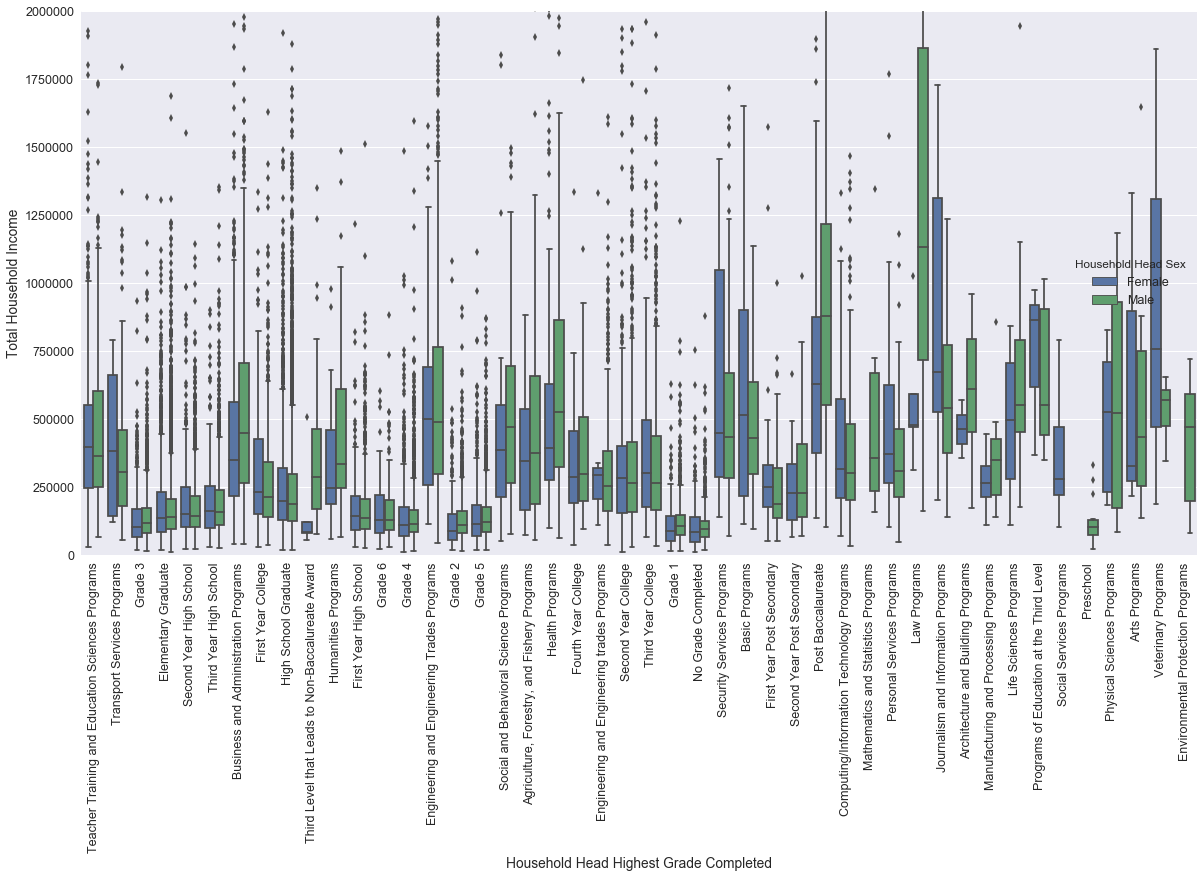

In [193]:
var = 'Household Head Highest Grade Completed' 
f, ax = plt.subplots(figsize=(20, 10))
s = sns.boxplot(x=var, y=target, hue=sex, data=df)
s.set_ylim(0,2000000)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

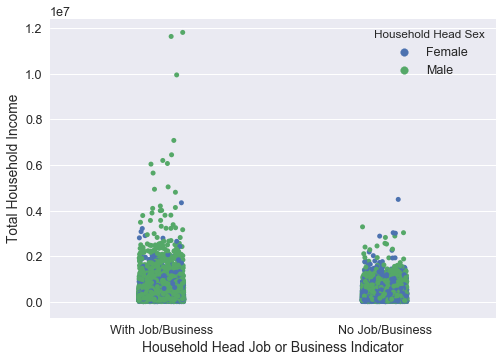

In [159]:
var = 'Household Head Job or Business Indicator' 
s = sns.stripplot(x=var, y=target, hue=sex, data=df, jitter=True)
plt.show()

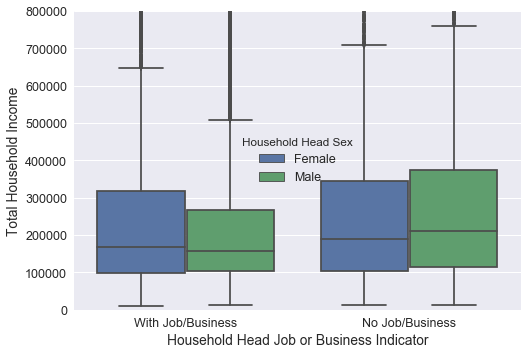

In [160]:
var = 'Household Head Job or Business Indicator' 
s = sns.boxplot(x=var, y=target, hue=sex, data=df)
s.set_ylim(0,800000)
plt.show()

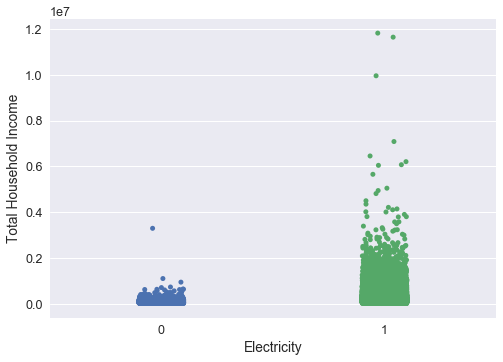

In [161]:
var = 'Electricity' 
sns.stripplot(x=var, y=target, data=df, jitter=True)
plt.show()

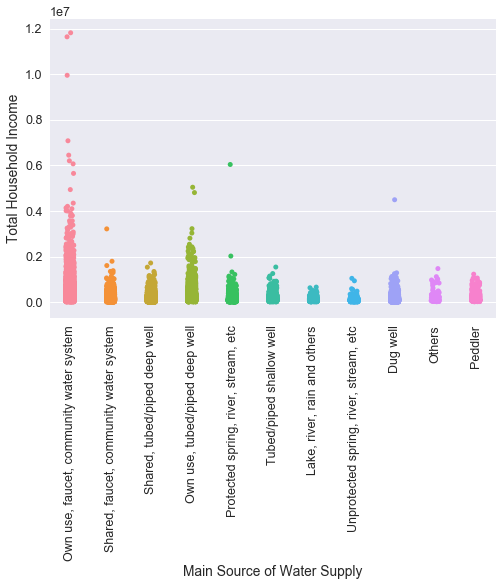

In [162]:
var = 'Main Source of Water Supply'
s = sns.stripplot(x=var, y=target, data=df, jitter=True)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

## Missing Values

In [163]:
df.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [194]:
df['Household Head Occupation'] = df['Household Head Occupation'].replace(np.nan, 'Other');
df['Household Head Occupation'] = df['Household Head Class of Worker'].replace(np.nan, 'Other');

## Classification Task

I'll start by binning the Total Household Income values into one of three categories:

1. <b>Low Income</b>: Income ranges from P11,285 to P122,244.67 (P940.42 - P10,187.06 per month)
2. <b>Middle Income</b>: Income ranges from P122,244.67 to P234,636.33 (P10187.06 - P19,553 per month)
3. <b>High Income</b>: Income ranges from 234,636.33 to 1,1815,988.00 (P19,553.02 - P984,665 per month)

In [197]:
y = df[target]
X = df[df.columns.difference([target])]

In [198]:
y_ = pd.qcut(y, 3, retbins=True)
y_

(0          (234636.333, 11815988]
 1        (122244.667, 234636.333]
 2             [11285, 122244.667]
 3             [11285, 122244.667]
 4        (122244.667, 234636.333]
 5        (122244.667, 234636.333]
 6        (122244.667, 234636.333]
 7        (122244.667, 234636.333]
 8        (122244.667, 234636.333]
 9          (234636.333, 11815988]
 10       (122244.667, 234636.333]
 11         (234636.333, 11815988]
 12            [11285, 122244.667]
 13       (122244.667, 234636.333]
 14            [11285, 122244.667]
 15       (122244.667, 234636.333]
 16            [11285, 122244.667]
 17       (122244.667, 234636.333]
 18            [11285, 122244.667]
 19            [11285, 122244.667]
 20       (122244.667, 234636.333]
 21            [11285, 122244.667]
 22       (122244.667, 234636.333]
 23            [11285, 122244.667]
 24            [11285, 122244.667]
 25            [11285, 122244.667]
 26            [11285, 122244.667]
 27       (122244.667, 234636.333]
 28            [1128

In [199]:
y = pd.qcut(y, 3, labels=["low income","middle income", "high income"])
y

0          high income
1        middle income
2           low income
3           low income
4        middle income
5        middle income
6        middle income
7        middle income
8        middle income
9          high income
10       middle income
11         high income
12          low income
13       middle income
14          low income
15       middle income
16          low income
17       middle income
18          low income
19          low income
20       middle income
21          low income
22       middle income
23          low income
24          low income
25          low income
26          low income
27       middle income
28          low income
29          low income
             ...      
41514    middle income
41515    middle income
41516    middle income
41517    middle income
41518       low income
41519      high income
41520      high income
41521      high income
41522      high income
41523      high income
41524       low income
41525    middle income
41526      

In [200]:
y.value_counts()

high income      13848
middle income    13848
low income       13848
Name: Total Household Income, dtype: int64

This gives us a balanced dataset.

In [201]:
cols = list(X.columns[X.dtypes != object])
std_scale = preprocessing.StandardScaler().fit(X[cols])
X[cols] = pd.DataFrame(std_scale.transform(X[cols]), columns=cols)

In [202]:
cols = list(X.columns[X.dtypes == object])
X = pd.DataFrame(pd.get_dummies(X, prefix=cols, columns=cols))

In [203]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Columns: 184 entries, Agricultural Household indicator to Type of Walls_Very Light
dtypes: float64(44), uint8(140)
memory usage: 19.5 MB


In [204]:
X.describe()

,Agricultural Household indicator,Alcoholic Beverages Expenditure,Bread and Cereals Expenditure,"Clothing, Footwear and Other Wear Expenditure",Communication Expenditure,Crop Farming and Gardening expenses,Education Expenditure,Electricity,Fruit Expenditure,House Age,...,Type of Roof_Mixed but predominantly strong materials,Type of Roof_Not Applicable,Type of Roof_Salvaged/makeshift materials,"Type of Roof_Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)",Type of Walls_Light,Type of Walls_NOt applicable,Type of Walls_Quite Strong,Type of Walls_Salvaged,Type of Walls_Strong,Type of Walls_Very Light
count,4.154400e+04,4.154400e+04,4.154400e+04,4.154400e+04,4.154400e+04,4.154400e+04,4.154400e+04,4.154400e+04,4.154400e+04,4.154400e+04,...,41544.00000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,1.305709e-13,-1.953099e-16,-1.394994e-18,-4.104891e-16,2.939729e-15,-4.922010e-15,-3.028752e-15,2.539598e-14,1.220219e-17,6.259489e-16,...,0.04819,0.000289,0.005103,0.802571,0.198994,0.000289,0.083935,0.010976,0.667702,0.038104
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,...,0.21417,0.016993,0.071254,0.398064,0.399248,0.016993,0.277294,0.104193,0.471043,0.191450
min,-6.352652e-01,-4.990182e-01,-1.866414e+00,-6.609324e-01,-5.611236e-01,-2.900069e-01,-3.522094e-01,-2.856349e+00,-8.588276e-01,-1.407843e+00,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.352652e-01,-4.990182e-01,-6.369760e-01,-4.788453e-01,-4.838499e-01,-2.900069e-01,-3.522094e-01,3.500973e-01,-5.137610e-01,-7.083111e-01,...,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-6.352652e-01,-3.748464e-01,-1.343889e-01,-2.954242e-01,-3.547864e-01,-2.900069e-01,-3.107369e-01,3.500973e-01,-2.459746e-01,-2.186390e-01,...,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.425855e-01,9.850134e-02,4.682256e-01,8.342378e-02,-2.678438e-02,-1.575064e-01,-1.608706e-01,3.500973e-01,1.850429e-01,4.109394e-01,...,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.320436e+00,2.690709e+01,5.500614e+01,4.692851e+01,1.998216e+01,7.799970e+01,3.409818e+01,3.500973e-01,9.132807e+01,1.258279e+01,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [173]:
pca = decomposition.PCA(n_components=50)
X = pca.fit_transform(X)

In [207]:
def train(X, y):
    test_size = 0.2
    seed = 42
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    classifiers = dict() 
    classifiers['GaussianNB'] = GaussianNB()
    classifiers['DecisionTreeClassifier'] = DecisionTreeClassifier(random_state=seed)
    classifiers['SVM'] = SVC()
    classifiers['LinearSVM'] = LinearSVC()
    classifiers['MLPClassifier'] = MLPClassifier()
    classifiers['Perceptron'] = Perceptron()
    classifiers['KNeighbors Classifier'] = KNeighborsClassifier()
    classifiers['RandomForestClassifier'] = RandomForestClassifier(n_estimators=300)

    # Iterate over dictionary
    for clf_name, clf in classifiers.items(): #clf_name is the key, clf is the value
        clf.fit(X_train, y_train)
        cv_scores = cross_val_score(knn, X_train, y_train, cv=10)
        print(cv_scores.mean())
        
        pred = clf.predict(X_test)
        score = metrics.accuracy_score(y_test, pred)
        print(clf_name + ': ' + str(score))
        print(metrics.classification_report(y_test, pred))

In [ ]:
train(X, y)